In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline

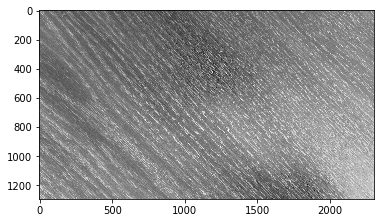

In [15]:
#./CC_TP1_photos/DSC_XXXX
img = cv2.imread("./CC_TP1_photos/DSC_0003.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="Greys")

In [75]:
#convert all images to grayscale
images = []
for i in range(1, 10):
    img = cv2.imread("./CC_TP1_photos/DSC_000{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)

img = cv2.imread("./CC_TP1_photos/DSC_0010.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
images.append(gray)

for i in range(1,6):
    img = cv2.imread("./CC_TP1_photos/DSC_001{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)
print(len(images))

15


(1296, 2304)
(1000, 1000)


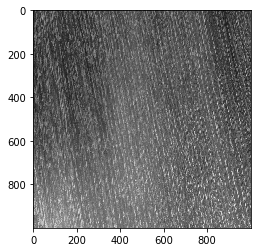

In [76]:
#we need to cut each image off
print(images[0].shape)
test = images[0][0:1000,0:1000]
print(test.shape)
plt.imshow(test, cmap="Greys")

#this crops all images
for i in range(0, len(images)):
    images[i] = images[i][0:1000,0:1000] 

uint8 (1000, 1000)


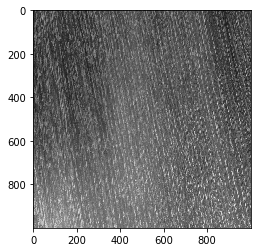

In [77]:
#convert images to double precision
#for i in range(0,len(images)):
#    images[i] = cv2.normalize(images[i].astype('int'),None,0,255,cv2.NORM_MINMAX)

#check whether or not we good...
print(images[0].dtype, images[0].shape)
plt.imshow(images[0], cmap="Greys")

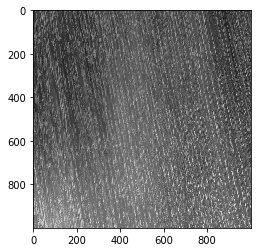

In [85]:
#denoising seems like it only works on int8 for opencv
test = cv2.fastNlMeansDenoising(images[0])
plt.imshow(test, cmap="Greys")

In [105]:
filtered = []
for i in range(0, len(images)):
    filtered.append(cv2.fastNlMeansDenoising(images[i]))
print(len(filtered))

15


In [87]:
W = []
for i in range(0, len(images)):
    W.append(images[i]-filtered[i])
print(len(W))

15


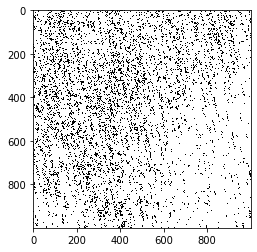

In [95]:
#show that the noise is something that we're looking at
plt.imshow(W[0], cmap="Greys")

In [ ]:
def calc_contribution(W, I):
    #element-wise

In [102]:
calc_contribution(W[0],images[0])

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([[0.        , 1.94444444, 1.49612403, ..., 0.        , 0.        ,
        0.13071895],
       [1.42335766, 0.        , 0.29613734, ..., 0.        , 0.        ,
        4.75      ],
       [0.        , 0.        , 0.69856459, ..., 0.        , 0.        ,
               nan],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ...,        nan, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])